# TSF PRACTICAL 1: SIMPLE LINEAR REGRESSION
* Life Test example
* Practical 1

# Simple linear regression -
is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:

* How strong the relationship is between two variables
* The value of the dependent variable at a certain value of the independent variable

# 1] Life Test Example

In [1]:
data_lt=read.csv("../input/lifetestdata/Lifetest.csv")

In [2]:
head(data_lt)

,Arm_Strength,Dynamic_Lift
,<dbl>,<dbl>
1,17.3,71.4
2,19.5,48.3
3,19.5,88.3
4,19.7,75.0
5,22.9,91.7
6,23.1,100.0


In [3]:
dim(data_lt)

[1] 25  2

In [4]:
x=data_lt$Arm_Strength
y=data_lt$Dynamic_Lift

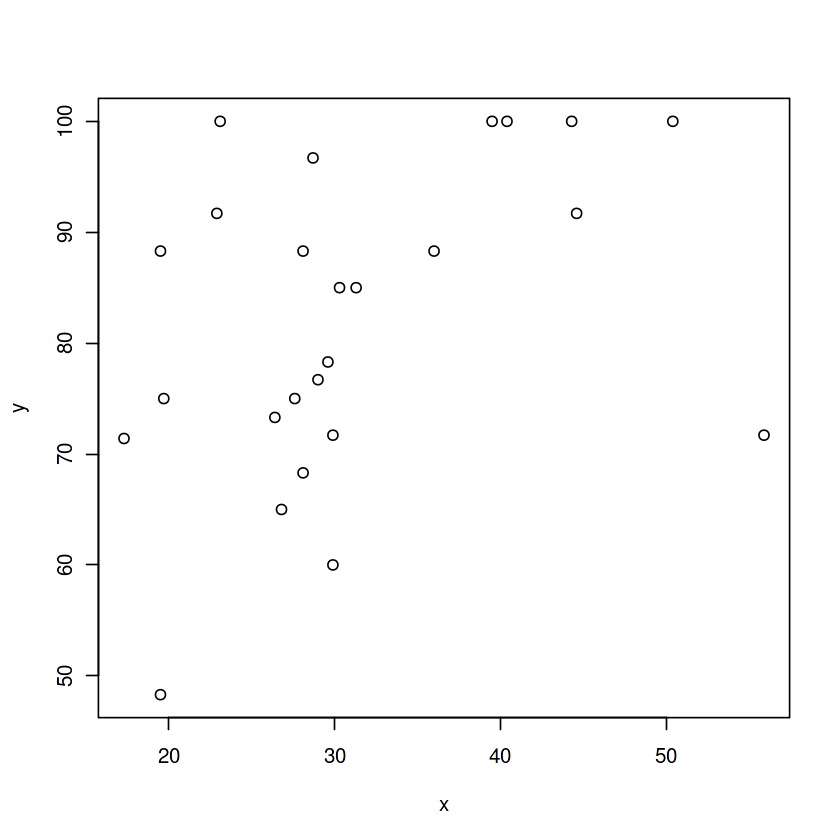

In [5]:
plot(x,y)

In [6]:
model=lm(y~x,data=data_lt)

In [7]:
model


Call:
lm(formula = y ~ x, data = data_lt)

Coefficients:
(Intercept)            x  
    64.5004       0.5614  


LEAST SQUARE ESTIMATOR

In [8]:
b=model$coefficients
e=model$residuals
yhat=model$fitted.values

In [9]:
b #least square estimators

(Intercept)           x 
 64.5004179   0.5613631

In [10]:
e

1           2           3           4           5           6 
 -2.8119989 -27.1469976  12.8530024  -0.5592702  14.3443680  22.5320954 
          7           8           9          10          11          12 
 -6.0204027 -14.5449480  -4.9940384   8.0252801 -11.9747199  16.0884622 
         13          14          15          16          17          18 
 -4.0799467  -2.8167645 -21.2851734  -9.5851734   3.4902813   2.9289183 
         19          20          21          22          23          24 
  3.5905119  13.3257412  12.8205144  10.6311985   2.1627895   7.2068838 
         25 
-24.1806131

In [11]:
sum(e)

[1] 1.44329e-14

In [12]:
cbind(y,yhat,e)

,y,yhat,e
1,71.4,74.21200,-2.8119989
2,48.3,75.44700,-27.1469976
3,88.3,75.44700,12.8530024
4,75.0,75.55927,-0.5592702
5,91.7,77.35563,14.3443680
6,100.0,77.46790,22.5320954
7,73.3,79.32040,-6.0204027
8,65.0,79.54495,-14.5449480
9,75.0,79.99404,-4.9940384
10,88.3,80.27472,8.0252801


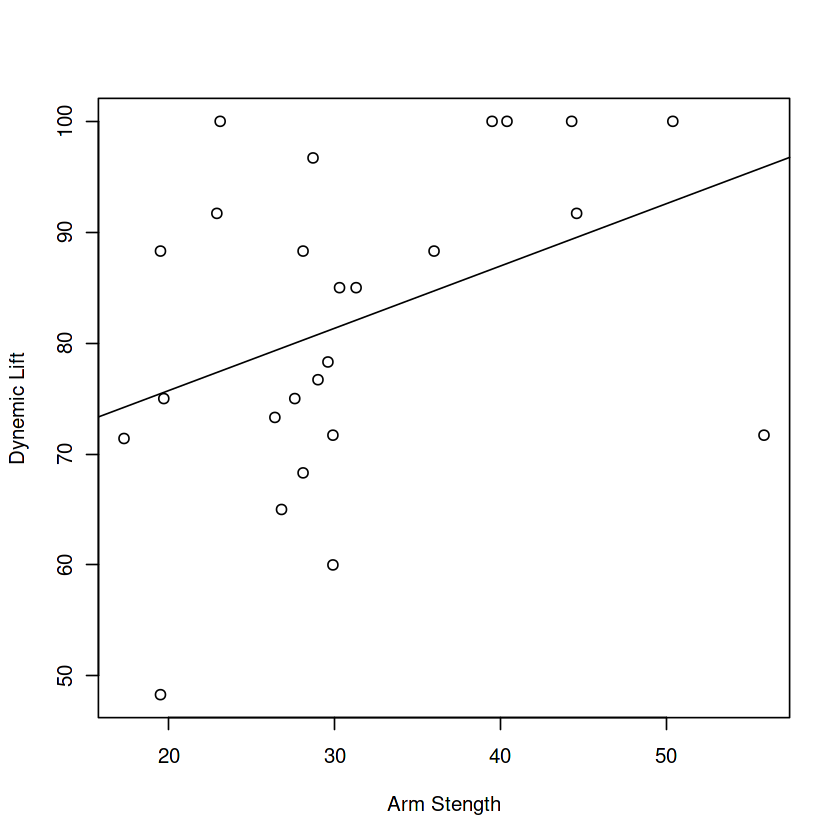

In [13]:
#Ploting Regression Line on scatter plot of X and Y
plot(x,y,xlab = "Arm Stength",ylab= "Dynemic Lift")
abline(model)


In [14]:
test_beta=summary(model)#returns summary of the model
test_beta


Call:
lm(formula = y ~ x, data = data_lt)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.147  -6.020   2.163  10.631  22.532 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.5004     8.9752   7.187 2.57e-07 ***
x             0.5614     0.2752   2.040    0.053 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.29 on 23 degrees of freedom
Multiple R-squared:  0.1532,	Adjusted R-squared:  0.1164 
F-statistic: 4.161 on 1 and 23 DF,  p-value: 0.053


p value is 0.05 < 0.5 , accept h0

In [15]:
Anova_table=anova(model)#ANOVA table
Anova_table

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,735.0632,735.0632,4.161421,0.05300059
Residuals,23,4062.6632,176.6375,NA,NA


In [16]:
yhat=model$fitted.value# Fitted value of y
yhat


1        2        3        4        5        6        7        8 
74.21200 75.44700 75.44700 75.55927 77.35563 77.46790 79.32040 79.54495 
       9       10       11       12       13       14       15       16 
79.99404 80.27472 80.27472 80.61154 80.77995 81.11676 81.28517 81.28517 
      17       18       19       20       21       22       23       24 
81.50972 82.07108 84.70949 86.67426 87.17949 89.36880 89.53721 92.79312 
      25 
95.88061

[1] 0.1532107

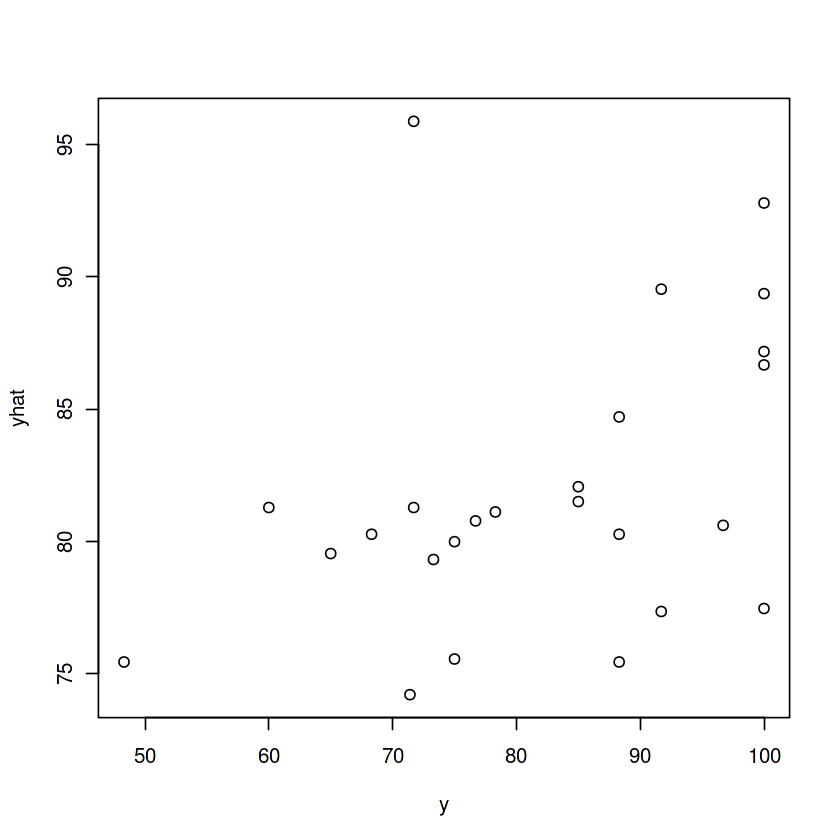

In [17]:
plot(y,yhat)
R2=test_beta$r.squared #R^2 value.
R2

In [18]:
conf_beta=confint(model,level=0.95)#confidence Interval for parameter
conf_beta

,2.5 %,97.5 %
(Intercept),45.933856383,83.066979
x,-0.007898174,1.130624


In [19]:
predict_data=predict(model,interval="confidence",level=0.95)
head(predict_data)


,fit,lwr,upr
1,74.21200,64.59871,83.82529
2,75.44700,66.83115,84.06284
3,75.44700,66.83115,84.06284
4,75.55927,67.03076,84.08778
5,77.35563,70.12358,84.58769
6,77.46790,70.30928,84.62653


In [20]:
new.data=data.frame(Arm_Strength=c(32.4,22.9,48.3))
predict_CI_new=predict(model,newdata = new.data,interval="confidence",level=0.95)
predict_CI_new

Warning message:
“'newdata' had 3 rows but variables found have 25 rows”


,fit,lwr,upr
1,74.21200,64.59871,83.82529
2,75.44700,66.83115,84.06284
3,75.44700,66.83115,84.06284
4,75.55927,67.03076,84.08778
5,77.35563,70.12358,84.58769
6,77.46790,70.30928,84.62653
7,79.32040,73.19232,85.44849
8,79.54495,73.51392,85.57598
9,79.99404,74.13535,85.85273
10,80.27472,74.50807,86.04137


# 2] PRACTICAL QUESTIONS

# Q1

In [21]:
#a
data_ins=read.csv("../input/pracs1/insurance.csv")

In [22]:
head(data_ins)

,X,Month,Quotes,TVadverts
,<int>,<chr>,<dbl>,<dbl>
1,1,2002 Jan,12.97065,7.212725
2,2,2002 Feb,15.38714,9.443570
3,3,2002 Mar,13.22957,7.534250
4,4,2002 Apr,12.97065,7.212725
5,5,2002 May,15.38714,9.443570
6,6,2002 Jun,11.72288,6.415215


In [23]:
x=data_ins$Quotes
y=data_ins$TVadverts

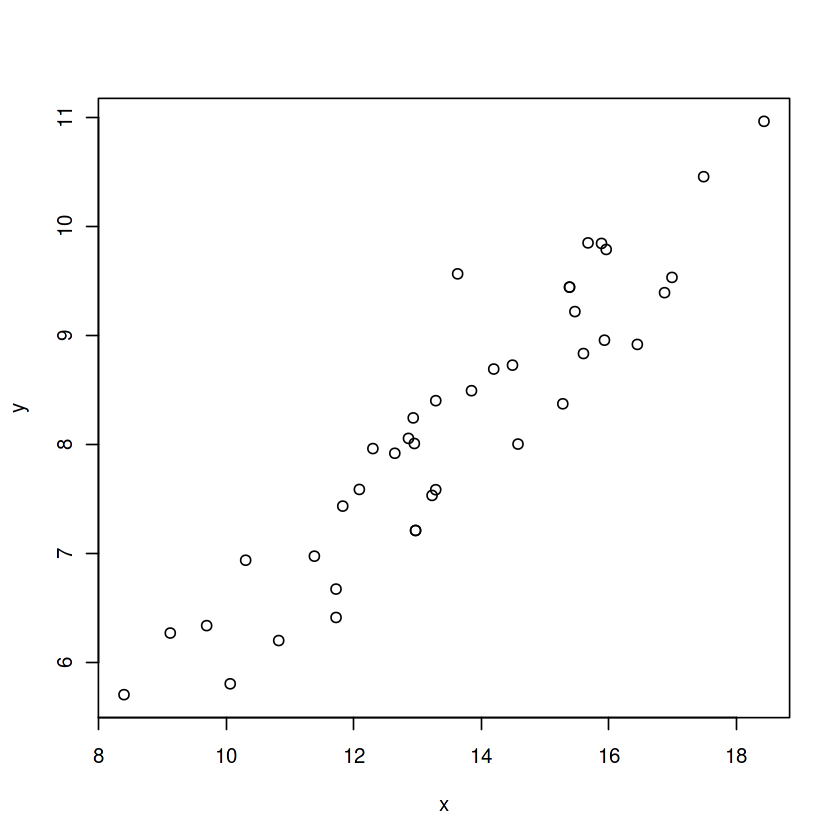

In [24]:
plot(x,y)

In [25]:
#b
m1=lm(y~x,data=data_ins)

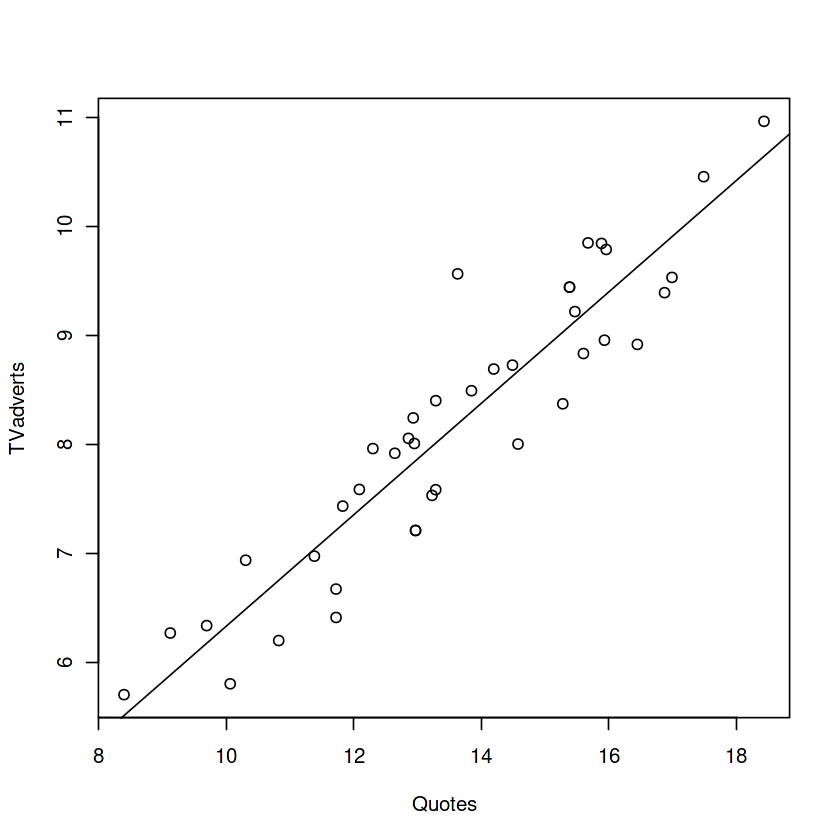

In [26]:
#Ploting Regression Line on scatter plot of X and Y
plot(x,y,xlab = "Quotes",ylab= "TVadverts")
abline(m1)


In [27]:
#c
s=summary(m1)#returns summary of the model
s


Call:
lm(formula = y ~ x, data = data_ins)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7998 -0.4508  0.1678  0.3582  1.3765 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.2315     0.4529   2.719  0.00982 ** 
x             0.5104     0.0328  15.562  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4915 on 38 degrees of freedom
Multiple R-squared:  0.8644,	Adjusted R-squared:  0.8608 
F-statistic: 242.2 on 1 and 38 DF,  p-value: < 2.2e-16


> p-value: < 2.2e-16, which is less than 0.5, hence we accept h0: B=0

In [28]:
#d
R2=s$r.squared
R2

[1] 0.8643665

> R squared is close to 1 which means its a good fit

In [29]:
#e
CI=confint(m1,level=0.95)#confidence Interval for parameter
CI


,2.5 %,97.5 %
(Intercept),0.3145349,2.148376
x,0.4440214,0.576821


In [30]:
CI[2,] #for slope

2.5 %    97.5 % 
0.4440214 0.5768210

> The confidence interval is 
* 2.5 %0.444021442054497
* 97.5 %0.576820958193824

# Q2

In [31]:
#a
data_bp=read.csv("../input/pracs1/blood_pressure.csv")

In [32]:
head(data_bp)

,Weight,Systolic.BP
,<int>,<int>
1,165,130
2,167,133
3,180,150
4,155,128
5,212,151
6,175,146


In [33]:
x=data_bp$Weight
y=data_bp$Systolic.BP

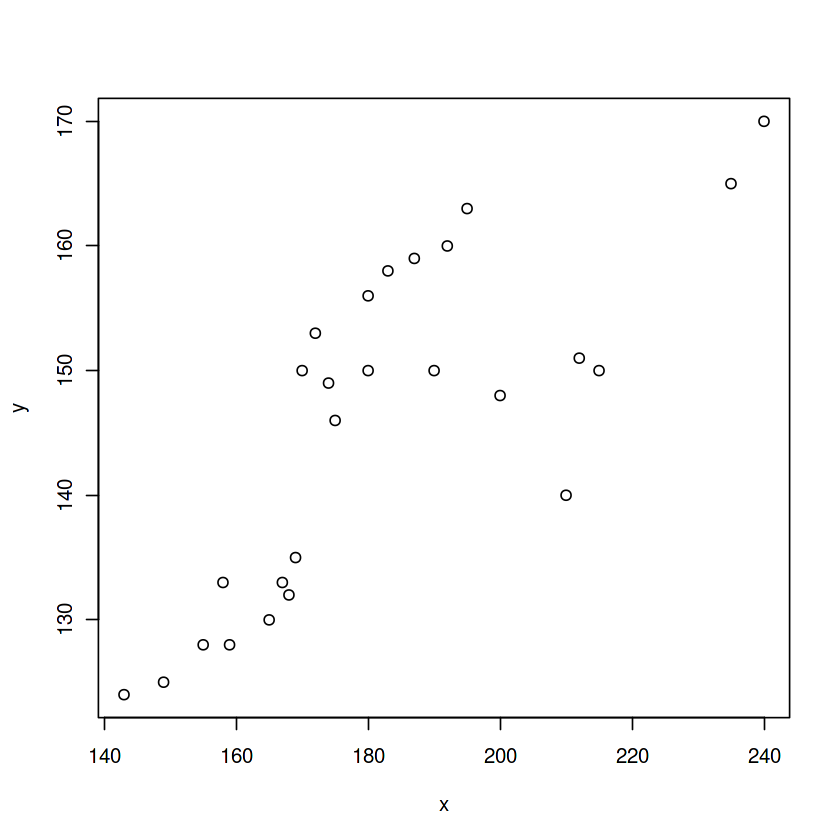

In [34]:
plot(x,y)

In [35]:
#b
m2=lm(y~x,data=data_bp)

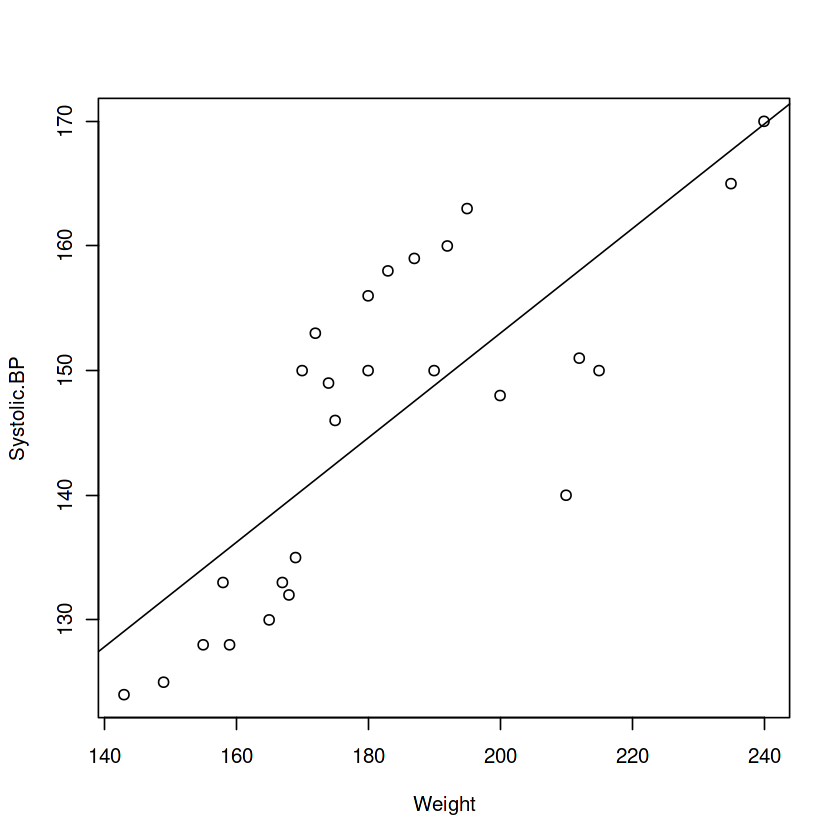

In [36]:
#Ploting Regression Line on scatter plot of X and Y
plot(x,y,xlab = "Weight",ylab= "Systolic.BP")
abline(m2)


In [37]:
#c
Anova_table=anova(m2)#ANOVA table
Anova_table

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,2693.581,2693.58122,35.74418,3.591105e-06
Residuals,24,1808.573,75.35719,NA,NA


In [38]:
Anova_table[1,4]
Anova_table[1,5]

[1] 35.74418

[1] 3.591105e-06

> F val > F tab , we reject the h0

In [39]:
#d
CI=confint(m2,level=0.90)#confidence Interval for parameter
CI


,5 %,95 %
(Intercept),47.016664,91.1920816
x,0.299393,0.5394374


In [40]:
CI[2,] #for slope

5 %      95 % 
0.2993930 0.5394374

In [41]:
p=summary(m2)#returns summary of the model
p


Call:
lm(formula = y ~ x, data = data_bp)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.182  -6.485  -2.519   8.926  12.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 69.10437   12.91013   5.353 1.71e-05 ***
x            0.41942    0.07015   5.979 3.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.681 on 24 degrees of freedom
Multiple R-squared:  0.5983,	Adjusted R-squared:  0.5815 
F-statistic: 35.74 on 1 and 24 DF,  p-value: 3.591e-06


In [42]:
#e
R2=p$r.squared
R2*100
#Variability percent

[1] 59.82872

> 59.82% variability is explained

In [43]:
#e
new.data=data.frame(Weight=c(150))
predict_CI_new=predict(m2,interval="confidence",level=0.90,newdata=new.data)
predict_CI_new



Warning message:
“'newdata' had 1 row but variables found have 26 rows”


,fit,lwr,upr
1,138.3079,134.7222,141.8935
2,139.1467,135.6956,142.5979
3,144.5991,141.6719,147.5263
4,134.1137,129.7186,138.5088
5,158.0204,153.4285,162.6123
6,142.5020,139.4561,145.5479
7,148.7933,145.7419,151.8446
8,157.1816,152.7726,161.5905
9,152.9874,149.3910,156.5838
10,131.5972,126.6398,136.5547


# Q3

In [44]:
#a
data_hts=read.table("../input/heightsdata/heights.txt")

In [45]:
head(data_hts)

,Mheight,Dheight
,<dbl>,<dbl>
1,59.7,55.1
2,58.2,56.5
3,60.6,56.0
4,60.7,56.8
5,61.8,56.0
6,55.5,57.9


In [46]:
x=data_hts$Mheight
y=data_hts$Dheight

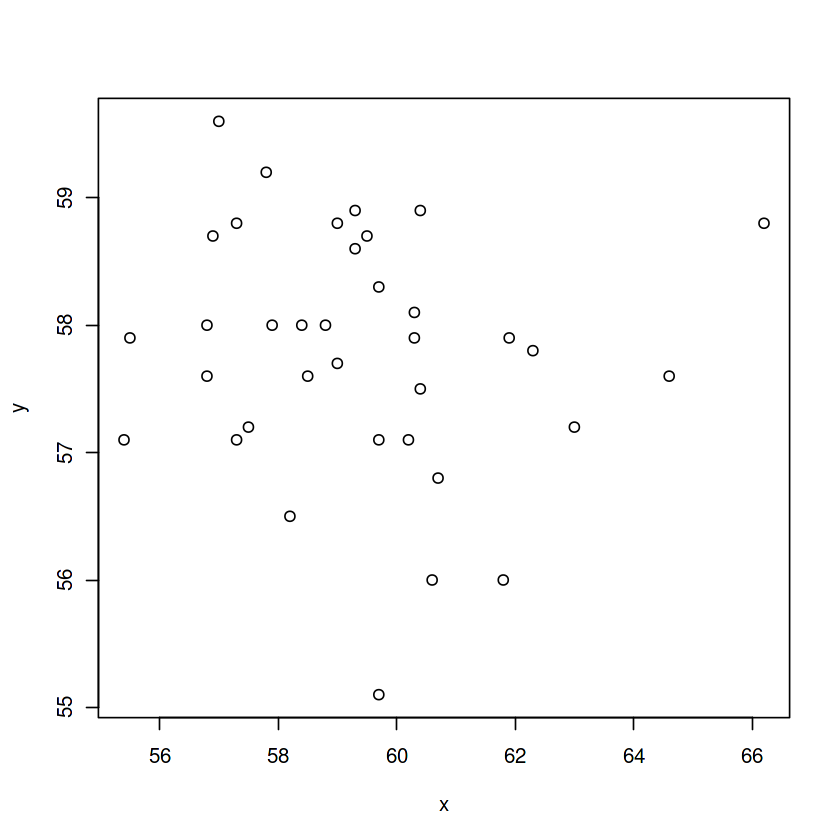

In [47]:
plot(x,y)

In [48]:
m3=lm(y~x,data=data_hts)

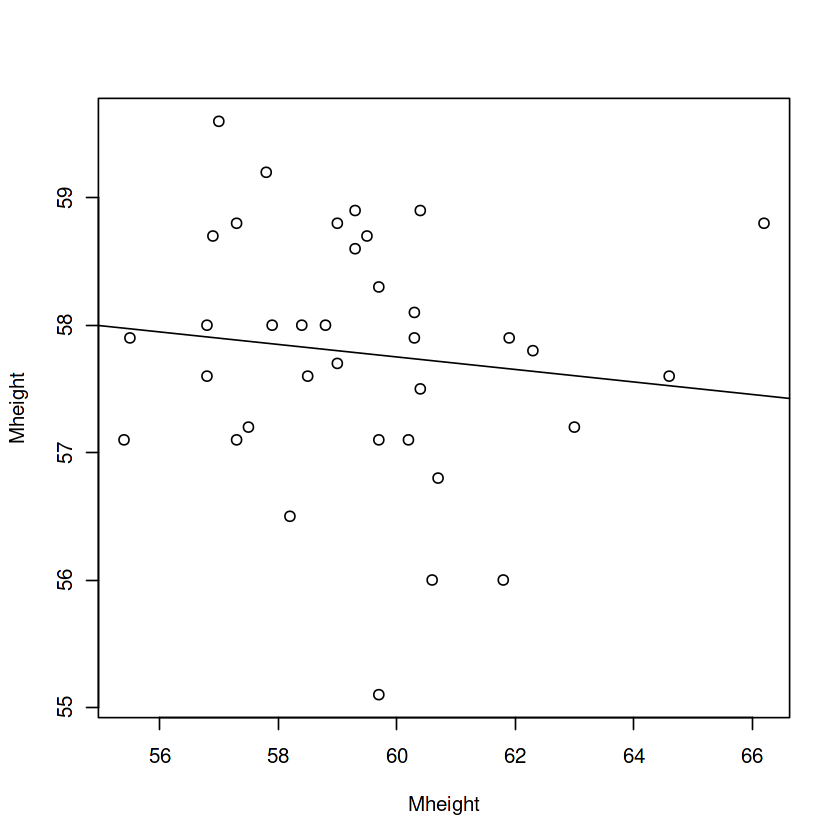

In [49]:
#Ploting Regression Line on scatter plot of X and Y
plot(x,y,xlab = "Mheight",ylab= "Mheight")
abline(m3)

In [50]:
#b
CI=confint(m3,level=0.99)#confidence Interval for parameter
CI

,0.5 %,99.5 %
(Intercept),49.2982529,72.0936300
x,-0.2408608,0.1426813


In [51]:
CI[2,]

0.5 %     99.5 % 
-0.2408608  0.1426813

> 1 is not included in Confidence Interval

In [52]:
#c
o=summary(m3)#returns summary of the model
o


Call:
lm(formula = y ~ x, data = data_hts)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6653 -0.6469  0.1194  0.8017  1.7022 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 60.69594    4.17743  14.529  3.8e-16 ***
x           -0.04909    0.07029  -0.698     0.49    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9746 on 34 degrees of freedom
Multiple R-squared:  0.01414,	Adjusted R-squared:  -0.01485 
F-statistic: 0.4878 on 1 and 34 DF,  p-value: 0.4897


In [53]:
#c
R2=o$r.squared
R2


[1] 0.01414375

In [54]:
#d
new.data = data.frame(Mheight=64)
predict_CI_new = predict(m3,interval = "confidence", level = 0.99, newdata=new.data)
predict_CI_new

Warning message:
“'newdata' had 1 row but variables found have 36 rows”


,fit,lwr,upr
1,57.76528,57.31811,58.21245
2,57.83892,57.34054,58.33730
3,57.72110,57.22076,58.22145
4,57.71619,57.20667,58.22572
5,57.66219,57.02173,58.30266
6,57.97146,57.10394,58.83898
7,57.97637,57.09231,58.86042
8,57.90764,57.24215,58.57314
9,57.87328,57.30090,58.44566
10,57.88310,57.28571,58.48049
